# Introduction to Data Visualization with Python Part 2

## Objective of script

In [ ]:
# Part 2

## 1. Create basic data visualizations in Python
## 2. Create representative data samples to avoid memory errors when executing code

# 01. Import Libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import dataframes, creating shortcut to data file and verify

path = r'/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/4 Achievement 4 Python Fundamentals for Data Analysts/Instacart Basket Analysis'
print(path) 

/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/4 Achievement 4 Python Fundamentals for Data Analysts/Instacart Basket Analysis


In [3]:
# Import merged dataframe part 1 of objectives; ords_prods_cstmrs.pkl

df_ords_prods_cstmrs = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_cstmrs.pkl'))

In [4]:
# Verify dimensions

df_ords_prods_cstmrs.shape

(32404859, 33)

In [5]:
# Verify general dataframe information

df_ords_prods_cstmrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

# 02. Bar Charts 

Text(0.5, 1.0, 'Orders For Day Of The Week')

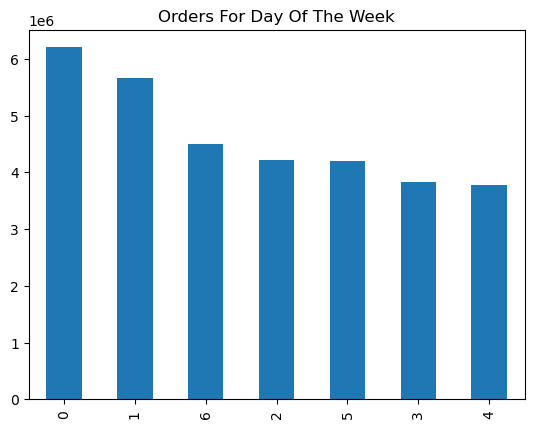

In [8]:
# Creating a bar chart, Orders For Day Of The Week 

df_ords_prods_cstmrs['orders_day_of_week'].value_counts().plot.bar()
plt.title('Orders For Day Of The Week')

Text(0.5, 1.0, 'Orders For Day Of The Week')

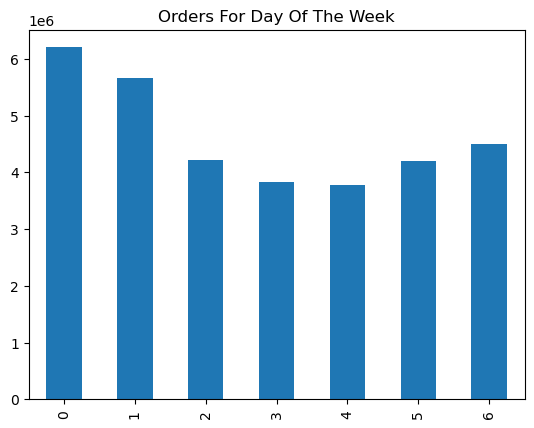

In [54]:
# Sort Orders For Day Of The Week by index rather than value count

barchart_order_dow = df_ords_prods_cstmrs['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Orders For Day Of The Week')

# 03. Histogram

Text(0.5, 1.0, 'Product Prices')

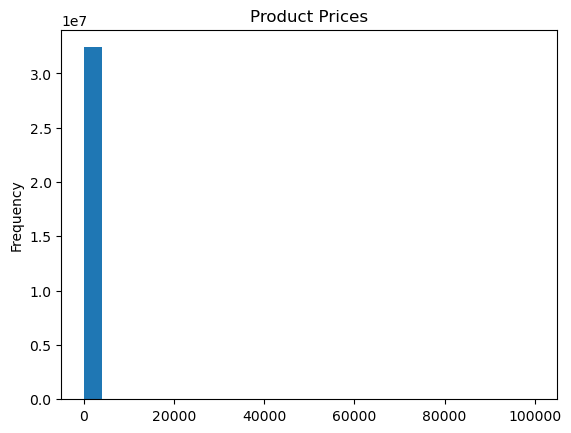

In [10]:
# Creating histogram from Prices column

df_ords_prods_cstmrs['prices'].plot.hist(bins =25)
plt.title('Product Prices')

In [11]:
# Intergity check to determine price outlier

df_ords_prods_cstmrs['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
# View of outliers through scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_cstmrs)
plt.title('Product Price Outlier')

Text(0.5, 1.0, 'Product Price Outlier')

In [ ]:
## Two product_id (21553, 33664) were previously identified to have possible accuracy issue
### Can clarify pricing with client before changing prices
### product_id 21553 and 33664 will be disregarded plotting only product >$100

In [14]:
# Correcting price outliers

df_ords_prods_cstmrs.loc[df_ords_prods_cstmrs['prices'] >100, 'prices'] = np.nan

In [15]:
# Check the max price

df_ords_prods_cstmrs['prices'].max()

25.0

Text(0.5, 1.0, 'Product Prices')

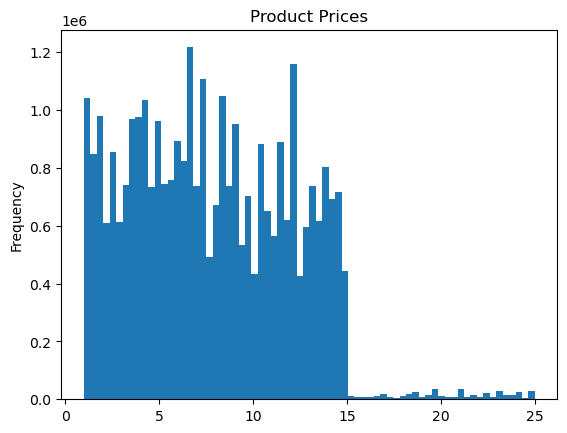

In [61]:
# Recreating histogram from Prices column with increased granularity (25 to 70)

hist_prices = df_ords_prods_cstmrs['prices'].plot.hist(bins =70)
plt.title('Product Prices')

# 04. Scatterplots

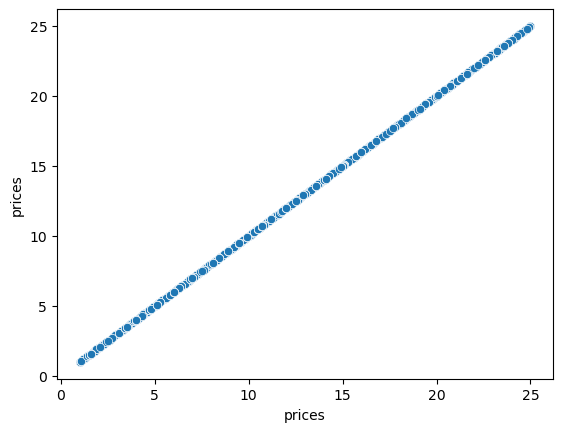

In [18]:
# Creating a scatterplot of prices after outlier corrected

scatterplot_prices = sns.scatterplot(x= 'prices', y = 'prices', data = df_ords_prods_cstmrs)

# 04. Line Charts

## Sampling Data from Dataframe

In [23]:
#Creating randominzed sampling for subset
## Create a List holding True/False values to the test np.random.rant () <= 0.7
### 1. Define the seed
### 2. Create random number
### 3. Code a logical test comparing each of those numbers to a value of 0.7
### 4. Store the results of the test in a new list, dev, in the form of boolean values (True/False)

np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cstmrs)) <= 0.7
dev

array([False,  True, False, ...,  True,  True,  True])

In [26]:
# Store 70% of the sample in the dataframe big

big = df_ords_prods_cstmrs[dev]

In [27]:
# Store 30% of the sample in the dataframe small

small = df_ords_prods_cstmrs[~dev]

In [30]:
# Check number of rows in list

len(df_ords_prods_cstmrs)

32404859

In [31]:
# Verify subset is equal in number of rows (big+small)

len(big) + len(small)

32404859

In [32]:
# Creating a subset from small sampling for line chart using only specific columns

df_small = small[['orders_day_of_week','prices']]

## Line chart from sampling (30%)

In [59]:
line_chart_prices_odow = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')
plt.title('Product Prices For Orders Per Day Of Week')

Text(0.5, 1.0, 'Product Prices For Orders Per Day Of Week')

# Exercise 4.9

## 4.9.2.3 Provide Instacart senior stakeholders with descriptive findings about sales. 

Text(0.5, 1.0, 'Number Of Orders Per Hour Of Day')

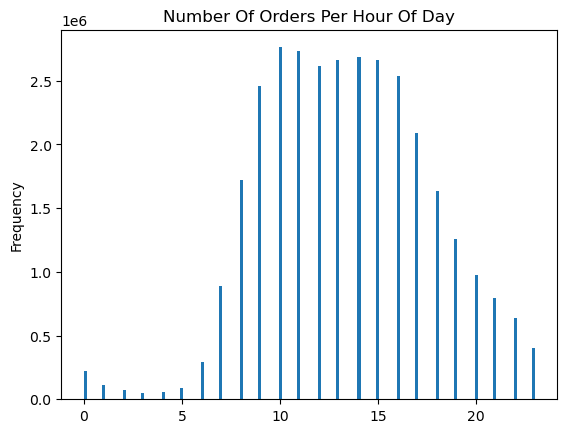

In [34]:
# Create histogram of the 'order_hour_of_day' columns

hist_order_hour_of_day = df_ords_prods_cstmrs['order_hour_of_day'].plot.hist(bins = 150)
plt.title('Number Of Orders Per Hour Of Day')

In [ ]:
# The histogram displays the frequency of orders per hour of day

## 4.9.2.4 The marketing team is curious about the distribution of orders among customers in terms of loyalty.

Text(0.5, 1.0, 'Customer Loyalty')

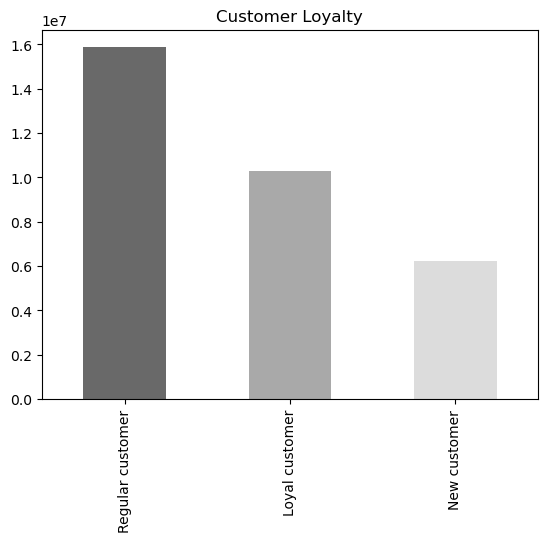

In [36]:
#  Create a bar chart from the “loyalty_flag” column

barchart_loyalty_customers = df_ords_prods_cstmrs['loyalty_flag'].value_counts().plot.bar(color = ['dimgray', 'darkgray', 'gainsboro'])
plt.title('Customer Loyalty')

## 4.9.2.5 Determine if there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

### To check this, you need to use an accurate sample for your line chart!

In [37]:
# Creating a line chart with using a subset from small dataframe

df_order_hour_of_day_prices = small[['order_hour_of_day','prices']]

In [38]:
# Dimensions check of subset new df

df_order_hour_of_day_prices.shape

(9721098, 2)

In [39]:
# Check general information of new df

df_order_hour_of_day_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int64  
 1   prices             float64
dtypes: float64(1), int64(1)
memory usage: 480.5 MB


In [42]:
# Check first five rows of new df

df_order_hour_of_day_prices.head()

order_hour_of_day  prices
0                   8     9.0
2                  12     9.0
3                   7     9.0
6                   9     9.0
10                  8    12.5

Text(0.5, 1.0, 'Product Prices For Orders Per Hour Of Day')

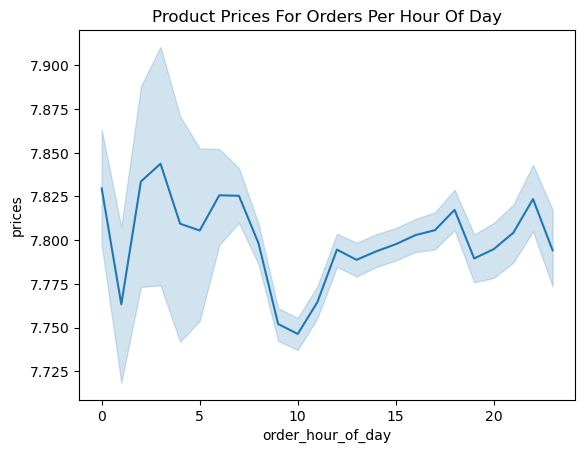

In [43]:
# Creating line chart

line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices')
plt.title('Product Prices For Orders Per Hour Of Day')

## 4.9.2.6 Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [44]:
# Creating a subset of age and number of dependents to use for the line chart comparison

df_age_dependants = small[['age','number_dependants']]

In [45]:
# Dimensions check of subset of age and number of dependents

df_age_dependants.shape

(9721098, 2)

In [46]:
# Check general information of subset of age and number of dependents

df_age_dependants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column             Dtype
---  ------             -----
 0   age                int64
 1   number_dependants  int64
dtypes: int64(2)
memory usage: 480.5 MB


In [47]:
# Check first five rows of subset of age and number of dependents

df_age_dependants.head()

age  number_dependants
0    31                  3
2    31                  3
3    31                  3
6    31                  3
10   31                  3

In [48]:
# Creating line chart from subset of age and number of dependents

line_chart_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age', y = 'number_dependants')
plt.title('Customers Age With Number Of Dependants')

Text(0.5, 1.0, 'Customers Age With Number Of Dependants')

In [ ]:
# The line chart displays the customer age vs number of dependants. Unable to draw correlation between variables. 

## 4.9.2.7 Explore if there’s a connection between age and spending power (income). Display relationship, in a scatterplot using the sns.scatterplot() function.

In [49]:
# Creating a subset of age and income to use for a scatterplot comparison

df_age_income = small[['age','income']]

In [50]:
# Dimension check of subset of age and income

df_age_income.shape

(9721098, 2)

In [51]:
# Check general information of subset of age and income

df_age_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   age     int64
 1   income  int64
dtypes: int64(2)
memory usage: 480.5 MB


In [52]:
# Check first five rows of subset of age and income

df_age_income.head()

age  income
0    31   40423
2    31   40423
3    31   40423
6    31   40423
10   31   40423

Text(0.5, 1.0, 'Customers Age vs Income')

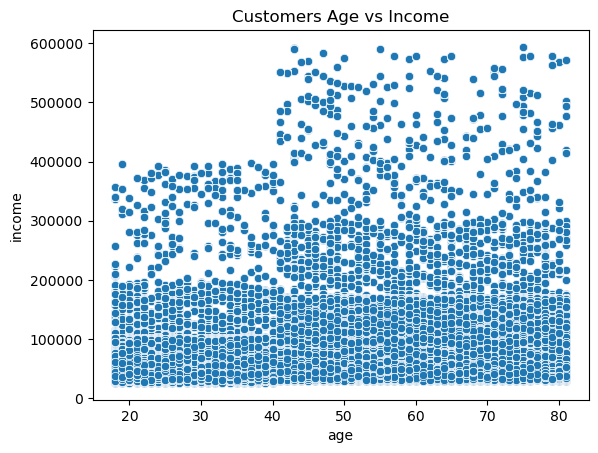

In [53]:
# Creating scatterplot of subset of age and income

scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)
plt.title('Customers Age vs Income')

In [ ]:
# The scatterplot displays the customers age with relationship to income.  
# The plot shows a correlation as the older the customer the higher the income therfore the greater the spending power.

## 4.9.2.8 Export the visualizations as “.png” files in the relevant project folder.

In [55]:
barchart_order_dow.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_ords_dow.png'))

In [62]:
hist_prices.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'histo_prices.png'))

In [58]:
scatterplot_prices.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'scatterplot_prices.png'))

In [60]:
line_chart_prices_odow.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'line_chart_prices_odow.png'))

In [64]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'hist_order_hour_of_day.png'))

In [65]:
barchart_loyalty_customers.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'barchart_loyalty_customers.png'))

In [66]:
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'line_chart_order_hour_of_day_prices.png'))

In [67]:
line_chart_age_dependants.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'line_chart_age_dependants.png'))

In [68]:
scatterplot_age_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'scatterplot_age_income.png'))